# Playing Multi-armed Bandits in the OpenAI Gym Environment

## *by Gertjan Verhoeven (2020)*

In this exercise, we are going to implement two algorithms to find the best slot machine (One-armed bandit) to play on.
We will make use of a Python package, `gym_bandits` , that contains a series of n-armed bandit environments for the OpenAI Gym.
We installed this package at the beginning of the course.

Using a Gym Environment means that the multi armed bandit is already implemented in code, and we can focus on the algorithms to optimize our long run reward.

First we will load the required libraries.
We encounter **matplotlib** as a new package. You can use this package to make plots, similar to the `plot()`  function in R.
Datacamp has a separate course for it, "Introduction to data visualization with matplotlib" .


In [1]:
import gym
import gym_bandits
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt


The `gym-bandits` package contains an environment `BanditTenArmedGaussian-v0` that exactly matches what is described on page 30 of S&B.
Lets make an instance of this environment.
We start with setting a seed to make sure we can reproduce the environment.
When the env is created, it generates 10 slot machines with average rewards drawn from a normal distribution.

(Check `bandit.py` in the [GitHub repo for `gym-bandits`](https://github.com/JKCooper2/gym-bandits) if you are curious how the environment is coded up.)



In [6]:
np.random.seed(30)
env = gym.make("BanditNArmedGaussianStdDev-v0", bandits = 10, stddev = 10) 
env.reset()

0

In [3]:
print(env.action_space)

Discrete(10)


Let us check what the output of a single action (step) is, we choose slot machine nr 1.
Run the cell a few times to see what the variation in rewards is we get.

In [ ]:
env.step(1)

Note that the `env.step()` call returns four objects.
* The first element holds information about the state. Since the slot machine does not change, this value is always 0.
* The second element holds the reward. 
* The third element informs us that the game has ended or not. `True` means the game has ended.
* The fourth element may contain optional information about e.g. the state that the agent is not allowed to use for decision making.

Now let us choose a different action (bandit arm), action 2:

In [ ]:
env.step(2)

Which action is better? Lets find out!

# Exercise 1: Playing all slot machines an equal number of times

a) Run each slot machine a 1000 times by calling `env.step()` and store the results in a numpy array of dimensions `[10][1000]`.

In [7]:
# your code here
rewards = np.zeros([10, 1000])
for number in range(10):
    for t in range(1000):
        observation, reward, done, info = env.step(number)
        rewards[number,t] = reward
    

b) Use **matplotlib** to plot a violin plot of the distributions of the 10 slot machines, similar to Figure 2.1 in S&B. Which slot machine has the highest average reward?

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f5e9121f908>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f5e9121f860>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f5e911c29e8>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f5e911c2eb8>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f5e911da3c8>}

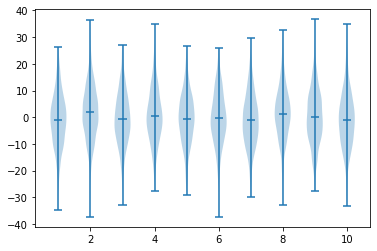

In [8]:
plt.violinplot(rewards.T, showmeans = True)

# Exercise 2: A simple bandit algorithm

We needed 10x1000 = 10.000 actions to find the best slot machine. Can we do it faster?

Let's code up an algorithm that chooses the action with the highest Q-value with probability `1- eps` and chooses a random action with probability `eps`.

a) If we chooses actions this way, for the case of 10 actions and epsilon = 0.1, what is the probability that the action with the highest Q-value is selected?

The Q-value table holds estimates of the average reward for each action. We can either use the incremental method as described in section 2.4, e.g. a step size parameter that decreases as 1/n, or we can use a constant step size parameter as described in section 2.5. 

b)Given what you know about the Bandit Gym environment, which one is better? Why?

c) Create an array of size 10, `q_table` to hold for each action its current estimated Q-value.
Write a function `choose_action()` that takes as arguments 

* a `q_table` that corresponds to the Q-values of each action, 
* and the parameter `eps`.

The function should first generate a uniform random number between 0 and 1. 
If this number is greater or equal than `eps`, choose the action with the highest Q-value. 
If not, choose an action at random.
The function returns the number of the chosen action. 
The Q-table can be used to infer the number of actions to choose from.

Test your function by running it a few times and checking its output.

Hint: Useful Numpy functions include `np.random.rand()`, `np.random.choice()`, `np.max()` and `np.where()`.



In [ ]:
action_size = env.action_space.n
all_actions = range(action_size)
q_table = np.arange(action_size)

def choose_action():
# YOUR CODE HERE




c) Use this function to implement the Epsilon-greedy algorithm described in pseudo code on page 32 of Sutton & Barto.
Initialize all Q-values at 0.
Choose `step_size = 0.1`. The action that the `choose_action()` function returns can be used directly to call the gym function `env.step()` to collect a reward for that action.

Hint: you can have a look at `ten_armed_testbed.py` for inspiration how to code things. 

In [ ]:
STEP_SIZE = 0.1 # or STEP_SIZE = ONE_OVER_N
TIME_STEPS = 1000
EPS = 0.1
action_size = env.action_space.n
actions = range(action_size)

# init q_table
q_table = np.zeros(action_size)
# YOUR CODE HERE


d) use matplotlib to plot the estimated Q-values over the violin plot you created earlier of all the slot machines. Did the algorithm find the correct average rewards?

In [ ]:
# YOUR CODE HERE

e) Now change the action selection function such that it chooses the action with the highest Upper Confidence Bound. 
It should take as arguments `q_table` and `c_val`.

Hint: create an `n_table` that contains for each action the number of times it was chosen. 
When implementing the formula on p 35, add a small numer like `1e-6` to Nt(a) to avoid dividing by zero. This simplifies your code.

Test your function by feeding it known inputs and checking its output.

In [ ]:
action_size = env.action_space.n
n_table = np.zeros(action_size)
q_table = np.arange(action_size)

actions = range(action_size)

def choose_action_ucb():
# YOUR CODE HERE


# Exercise 3: Epsilon-greedy versus UCB: which is better?

Let us create a simulation study where we can precisely measure the performance of our algorithms.
The objective is to compare epsilon greedy with UCB, and make a plot similar to S&B p36.

First, think about what you expect based on how the algorithms work. Which will reach the highest reward in the long run?

a) Run the epsilon greedy algorithm 2000 times, each time for a 1000 steps. Store all rewards in a numpy array of size `[2000][1000]`.

Do the same for the UCB algorithm.




In [ ]:
METHODS = 2
RUNS = 2000
TIME_STEPS = 1000
STEP_SIZE = 0.1 # or STEP_SIZE = ONE_OVER_N

action_size = env.action_space.n
actions = range(action_size)

# define methods
EPS_GREEDY = 0
UCB = 1

# YOUR CODE HERE
    
    
    


b) For each algorithm, for each timestep, average the rewards over all runs. This shows how fast, on average, the algorithm finds the best slot machine.
Plot the average rewards as a function of time steps for both algorithms in a single plot.

Which one performs better? What performance criterium did you use?

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE